Ye-seul Oh.

* 마크다운 사용법: https://gist.github.com/ihoneymon/652be052a0727ad59601

# <span style="color:blue">15주차(1) Support Vector Machine - SVM ,prepocessing</span>

In [2]:
# 필요한 패키지를 읽어들임. 
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import rdkit
import rdkit.Chem as Chem

In [6]:
# csv파일(엑셀파일을 콤마로 나눈 텍스트 파일)은 pandas와 연동이 된다는 장점이 있다.
drugs = pd.read_csv("drugs.csv")
drugs

,smiles,is_drug
0,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,1
1,C#CCN[C@@H]1CCC2=CC=CC=C12,1
2,C1(CC[C@@]2([C@@H](CC(N)=O)[C@@]3([C@@]4([N+]5...,1
3,C1C2CNCC1C1=C2C=C2N=CC=NC2=C1,1
4,C1CN2C[C@@H](N=C2S1)C1=CC=CC=C1,1
...,...,...
595,CO[C@H]1[C@H](O)CC(=O)O[C@H](C)C\C=C\C=C\[C@H]...,1
596,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1
597,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1
598,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C2=O)C2=C(C(O)=C3...,1


In [7]:
non_drugs = pd.read_csv("non_drugs.csv")
non_drugs

,smiles,is_drug
0,CC1CCCCN1CCCNCC2(COC2)C,0
1,CCCC1CCC2=C(C1)SC(=N2)NC(=O)CCNC,0
2,CN1C(=C(C(=N1)C2=CC(=CN=C2)F)C3=CC=CC=C3Cl)N,0
3,CCCCCCCCCCCC(C)COC(=O)C(=C)C,0
4,CCCC(CNC)N1CCN(CC1)C2=CC(=CC=C2)OC,0
...,...,...
994,CC1=CC=CC=C1NC(=O)C2=C(C=CC(=C2)NC(=O)C(C)N3CC...,0
995,CC1=C(C(=CC(=C1)Br)C(=O)NC(=S)NC2=C(C(=CC=C2)[...,0
996,CC(C)(C)OC(=O)N1CCOC(C(C1)C2=CC(=C(C=C2)Cl)Cl)CO,0
997,CCCCCCCCCCCC=COC(=O)C1=C(C(=CC=C1)S(=O)(=O)[O-...,0


## ☆ 약 분자에 descripoters 넣기

지난 시간에는 빈딕셔너리에 데이터를 넣는 것이였는데 이번에는 이미 있는 ↑ dataframe에다가 새로운 열로 4개의 descriptors를 추가 해 줄 것이다.  
먼저 빈리스트 4개를 만들고 각 리스트에 기존 dataframe에 들어있는 분자들에 for문을 돌려서 해당 descriptor 계산 값을 추가(append)하고  
이미 있는 dataframe에 df['열이름']=리스트이름 하면 기존 dataframe에 column이 추가 된다.   

In [8]:
# 분자들의 특징 (descriptor) 을 뽑아내자. 
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcCrippenDescriptors, CalcNumLipinskiHBA, CalcNumLipinskiHBD

# 빈 리스트 준비. 
mw = []   # molecular weight
hba = []  # hbond acceptor
hbd = []  # hbond donor
logp = [] # logP 

# 분자를 차례로 반복하면서 특징 값을 계산. 
for smi in drugs["smiles"]:
    m = Chem.MolFromSmiles(smi)
    mw.append(CalcExactMolWt(m))
    logp.append(CalcCrippenDescriptors(m)[0]) # because calccrippendescriptors returns two values: logp, mr
    hba.append(CalcNumLipinskiHBA(m))
    hbd.append(CalcNumLipinskiHBD(m))

In [9]:
mw

[315.00072404,
 171.104799416,
 1343.5878012219998,
 211.110947416,
 204.072119384,
 86.08439831999999,
 140.106196384,
 465.19132297600004,
 472.2335221360001,
 447.23827316800003,
 324.11437811999997,
 353.08993719999995,
 308.104858992,
 309.07832696,
 820.880323412,
 530.148760736,
 613.769650768,
 151.063328528,
 221.988132052,
 181.040878832,
 337.14378433999997,
 75.0320284,
 163.030314148,
 373.11479271999997,
 361.13140808800006,
 307.026291388,
 180.042258736,
 321.143704088,
 370.101230156,
 296.116092372,
 254.094294308,
 244.089957876,
 242.094294308,
 260.050715244,
 293.16404560800004,
 226.110613068,
 501.287908728,
 501.198849614,
 234.125594436,
 392.20999275599996,
 471.313729552,
 519.10105154,
 613.3628049839999,
 239.152143532,
 225.136493468,
 240.1473925,
 309.194008344,
 239.152143532,
 291.21982916800005,
 344.2562742519999,
 219.110672644,
 474.23793882,
 149.12044948,
 473.13987748400007,
 318.06588664,
 361.1080857999999,
 516.309572776,
 276.07217687200006

* pandas DataFrame에 새로운 열을 추가. 

In [10]:
drugs["MW"] = mw 

In [11]:
drugs

,smiles,is_drug,MW
0,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,1,315.000724
1,C#CCN[C@@H]1CCC2=CC=CC=C12,1,171.104799
2,C1(CC[C@@]2([C@@H](CC(N)=O)[C@@]3([C@@]4([N+]5...,1,1343.587801
3,C1C2CNCC1C1=C2C=C2N=CC=NC2=C1,1,211.110947
4,C1CN2C[C@@H](N=C2S1)C1=CC=CC=C1,1,204.072119
...,...,...,...
595,CO[C@H]1[C@H](O)CC(=O)O[C@H](C)C\C=C\C=C\[C@H]...,1,842.514005
596,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1,785.352359
597,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1,697.309826
598,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C2=O)C2=C(C(O)=C3...,1,846.441509


* MW column 이 생겼다!

In [12]:
drugs["HBA"] = hba
drugs["HBD"] = hbd
drugs["logp"] = logp

In [13]:
drugs

,smiles,is_drug,MW,HBA,HBD,logp
0,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,1,315.000724,4,1,2.63360
1,C#CCN[C@@H]1CCC2=CC=CC=C12,1,171.104799,1,1,1.89670
2,C1(CC[C@@]2([C@@H](CC(N)=O)[C@@]3([C@@]4([N+]5...,1,1343.587801,27,15,0.92454
3,C1C2CNCC1C1=C2C=C2N=CC=NC2=C1,1,211.110947,3,1,1.80390
4,C1CN2C[C@@H](N=C2S1)C1=CC=CC=C1,1,204.072119,2,0,2.14610
...,...,...,...,...,...,...
595,CO[C@H]1[C@H](O)CC(=O)O[C@H](C)C\C=C\C=C\[C@H]...,1,842.514005,16,4,2.32510
596,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1,785.352359,14,5,6.15784
597,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C)C(O)=C4C(O)=C(N...,1,697.309826,13,6,4.75412
598,CO[C@H]1\C=C\O[C@@]2(C)OC3=C(C2=O)C2=C(C(O)=C3...,1,846.441509,15,5,4.61572


* H-bond donor, acceptor, logp column이 생성되었다!
* 분자와 그것의 특성 값을 가지는 테이블이 완성되었다!

----

## ☆ 약이 아닌 분자에 대해서도 반복!

In [14]:
mw = []
hba = []
hbd = []
logp = []
 
for smi in non_drugs["smiles"]:
    m = Chem.MolFromSmiles(smi)
    mw.append(CalcExactMolWt(m))
    logp.append(CalcCrippenDescriptors(m)[0]) # because calccrippendescriptors returns two values: logp, mr
    hba.append(CalcNumLipinskiHBA(m))
    hbd.append(CalcNumLipinskiHBD(m))

RDKit WARNING: [10:39:14] WARNING: not removing hydrogen atom without neighbors


In [15]:
non_drugs["MW"] = mw
non_drugs["HBA"] = hba
non_drugs["HBD"] = hbd
non_drugs["logp"] = logp

In [16]:
non_drugs

,smiles,is_drug,MW,HBA,HBD,logp
0,CC1CCCCN1CCCNCC2(COC2)C,0,240.220164,3,1,1.87700
1,CCCC1CCC2=C(C1)SC(=N2)NC(=O)CCNC,0,281.156183,4,2,2.59610
2,CN1C(=C(C(=N1)C2=CC(=CN=C2)F)C3=CC=CC=C3Cl)N,0,302.073452,4,2,3.52380
3,CCCCCCCCCCCC(C)COC(=O)C(=C)C,0,282.255880,2,0,5.66270
4,CCCC(CNC)N1CCN(CC1)C2=CC(=CC=C2)OC,0,291.231063,4,1,2.20530
...,...,...,...,...,...,...
994,CC1=CC=CC=C1NC(=O)C2=C(C=CC(=C2)NC(=O)C(C)N3CC...,0,674.298346,11,6,5.12654
995,CC1=C(C(=CC(=C1)Br)C(=O)NC(=S)NC2=C(C(=CC=C2)[...,0,437.004489,7,2,4.10954
996,CC(C)(C)OC(=O)N1CCOC(C(C1)C2=CC(=C(C=C2)Cl)Cl)CO,0,375.100414,5,1,3.70520
997,CCCCCCCCCCCC=COC(=O)C1=C(C(=CC=C1)S(=O)(=O)[O-...,0,1250.664991,14,0,19.16620


### 약이 아닌 분자들의 SMILES와 특징 값을 가지는 테이블이 완성되었다!

## ☆ 두개의 Table을 합쳐서 하나로 만들자!
* pd.concat 이라는 함수를 사용!
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [17]:
all_data = pd.concat([drugs, non_drugs], ignore_index=True) # drugs, non_drugs를 합쳐서 all_data라는 DataFrame을 생성! #ignore_index=True: 앞의 인덱스를 새로 지정해라!

In [18]:
all_data

,smiles,is_drug,MW,HBA,HBD,logp
0,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,1,315.000724,4,1,2.63360
1,C#CCN[C@@H]1CCC2=CC=CC=C12,1,171.104799,1,1,1.89670
2,C1(CC[C@@]2([C@@H](CC(N)=O)[C@@]3([C@@]4([N+]5...,1,1343.587801,27,15,0.92454
3,C1C2CNCC1C1=C2C=C2N=CC=NC2=C1,1,211.110947,3,1,1.80390
4,C1CN2C[C@@H](N=C2S1)C1=CC=CC=C1,1,204.072119,2,0,2.14610
...,...,...,...,...,...,...
1594,CC1=CC=CC=C1NC(=O)C2=C(C=CC(=C2)NC(=O)C(C)N3CC...,0,674.298346,11,6,5.12654
1595,CC1=C(C(=CC(=C1)Br)C(=O)NC(=S)NC2=C(C(=CC=C2)[...,0,437.004489,7,2,4.10954
1596,CC(C)(C)OC(=O)N1CCOC(C(C1)C2=CC(=C(C=C2)Cl)Cl)CO,0,375.100414,5,1,3.70520
1597,CCCCCCCCCCCC=COC(=O)C1=C(C(=CC=C1)S(=O)(=O)[O-...,0,1250.664991,14,0,19.16620


# Support Vector Machine (SVM)

**Random Forest**, **NeuralNet** 과 더불어 가장 많이 사용되는 ML 기법. 

## 장점
* 고차원 데이터에서 잘 작동함. 
* 데이터 숫자보다 feature dimension(특징의 개수)이 클 때에도 효과적임. 
* 메모리를 많이 필요로 하지 않음. (RF는 tree의 개수가 많을 수록 메모리가 많이 소요)

## 개념
### SVM은 고차원에서 두개의 그룹을 가장 넓게 분리하는(최적으로 가르는) 가상의 평면(선)을 찾아내는 방법이다. 

* 각 그룹에서 가상의 구분선까지의 수직으로 내릴 길이(거리)가 가장 짧은 데이터를 **support vector** 라고 부른다. 
* support vectior: 아래 그림상 진한 동그라미

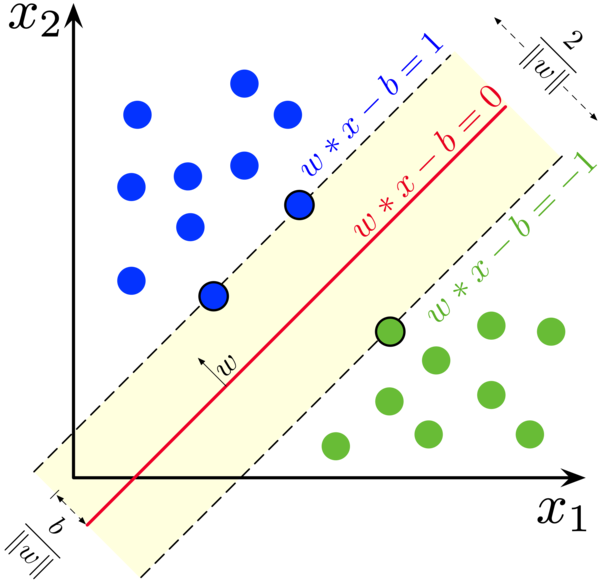

* 구분선을 선형(직선, linear)로 할 수도 있고, 곡선(non-linear)으로 할 수도 있다. 
* 이것을 결정해주기 위해서는 kernel(:core, 핵심)을 바꾸면 된다. 
* kernel <= core : 모델의 핵심에 들어있는 수학함수의 형태. 
* kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
    * linear: 선형 (ax+b)
    * poly: ax^3 + bx^2 + cx + d (3차원 다항식 커널)
    * **rbf**: Gaussian 과 비슷
    * sigmoid: 1/(1+e^x)
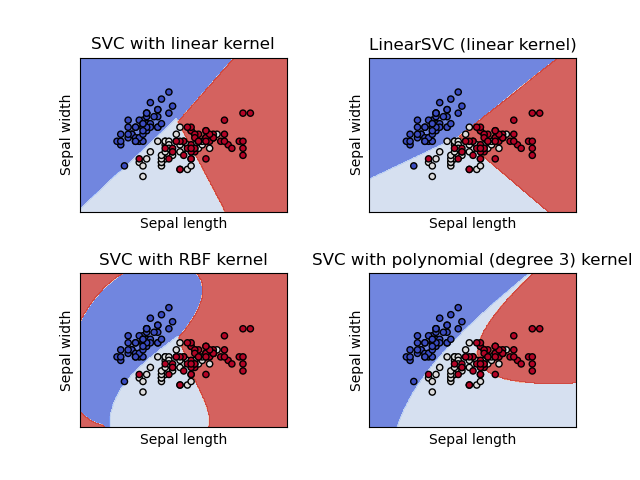  

# Support vector machine을 사용해보자!

## ☆ 전체 데이터를 분리하자. 일단, X,y를 지정하자.

In [21]:
from sklearn.model_selection import train_test_split # train_test_split 함수를 불러오자. 

In [18]:
all_data  #첫번째 colomn: smiles  (idx 아님)

,smiles,is_drug,MW,HBA,HBD,logp
0,BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1,1,315.000724,4,1,2.63360
1,C#CCN[C@@H]1CCC2=CC=CC=C12,1,171.104799,1,1,1.89670
2,C1(CC[C@@]2([C@@H](CC(N)=O)[C@@]3([C@@]4([N+]5...,1,1343.587801,27,15,0.92454
3,C1C2CNCC1C1=C2C=C2N=CC=NC2=C1,1,211.110947,3,1,1.80390
4,C1CN2C[C@@H](N=C2S1)C1=CC=CC=C1,1,204.072119,2,0,2.14610
...,...,...,...,...,...,...
1594,CC1=CC=CC=C1NC(=O)C2=C(C=CC(=C2)NC(=O)C(C)N3CC...,0,674.298346,11,6,5.12654
1595,CC1=C(C(=CC(=C1)Br)C(=O)NC(=S)NC2=C(C(=CC=C2)[...,0,437.004489,7,2,4.10954
1596,CC(C)(C)OC(=O)N1CCOC(C(C1)C2=CC(=C(C=C2)Cl)Cl)CO,0,375.100414,5,1,3.70520
1597,CCCCCCCCCCCC=COC(=O)C1=C(C(=CC=C1)S(=O)(=O)[O-...,0,1250.664991,14,0,19.16620


**X (분자의 feature) 는 3번째 열(column)부터 끝까지이다.**

**그러므로 입력데이터는 (전체 행, 3번째 열부터 마지막 열까지)에 해당한다.**

In [24]:
X = all_data.iloc[:, 2:] # all_data 에서 전체 행 & 3번째 열~마지막열

In [25]:
X

,MW,HBA,HBD,logp
0,315.000724,4,1,2.63360
1,171.104799,1,1,1.89670
2,1343.587801,27,15,0.92454
3,211.110947,3,1,1.80390
4,204.072119,2,0,2.14610
...,...,...,...,...
1594,674.298346,11,6,5.12654
1595,437.004489,7,2,4.10954
1596,375.100414,5,1,3.70520
1597,1250.664991,14,0,19.16620


In [26]:
X.describe()

,MW,HBA,HBD,logp
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,367.913854,5.474672,1.649156,3.204952
std,171.423652,3.889809,2.167021,2.094249
min,46.041865,0.000000,0.000000,-11.627860
25%,270.107745,3.500000,1.000000,1.981650
50%,340.201159,5.000000,1.000000,3.115400
75%,431.188003,7.000000,2.000000,4.292950
max,4111.115377,104.000000,61.000000,19.166200


**y (목적 값, 예측하고 싶은 값) 는 is_drug 이라는 이름을 가진 열에 해당한다!**

In [27]:
y = all_data["is_drug"] # all_data 의 is_drug의 열

In [28]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: is_drug, Length: 1599, dtype: int64

## ★ SVM은 **preprocessing**이 필요하다!
* preprocessing = **전처리**
* SVM의 경우, X (Feature) 들의 절대값이 너무 차이가 나면 잘 작동하지 않는다. (MW는 300인데 HBA는 4) 
* 그러므로, 전체 값을 표준화 하여야 한다. (수능의 표준점수를 생각해보자!)
* 가장 기본이 되는 **정규분포**의 경우: 표준점수 = (원점수 - 평균) / 표준편차  (평균에 비해서 어떻냐)
* 전처리 함수들이 scikit-learn에 미리 구현되어 있다. 
* https://scikit-learn.org/stable/modules/preprocessing.html

In [30]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler() # 정규분포로 바꾸어 준다 (표준 점수로 바꾸어 준다.)   #1.스케일러를 정의한다음
X_scaled = standard_scaler.fit_transform(X) # 2.fit_transform이라고 하는 메소드에 X를 넣어주어 스케일된 X가 나옴!

### 보정된 값을 확인해보자!

In [31]:
X_scaled   #각각의 평균과 표준편차를 고려해서 평균보다 작은 애들은 - , 큰애들은 + 로 보정되었음.

array([[-0.30876535, -0.37923017, -0.29965505, -0.27290473],
       [-1.14844493, -1.15071749, -0.29965505, -0.62488325],
       [ 5.69337527,  5.535506  ,  6.16284785, -1.08923314],
       ...,
       [ 0.04193592, -0.12206773, -0.29965505,  0.23894243],
       [ 5.1511404 ,  2.19239425, -0.7612624 ,  7.62385195],
       [ 0.87709524,  0.39225716, -0.29965505,  1.06875961]])

In [32]:
X_scaled_df = pd.DataFrame(X_scaled)   #numpy array형태로 사용해도 상관 없지만 보기 좋으라고 pandas daframe에 넣어줬다.

In [33]:
X_scaled_df

,0,1,2,3
0,-0.308765,-0.379230,-0.299655,-0.272905
1,-1.148445,-1.150717,-0.299655,-0.624883
2,5.693375,5.535506,6.162848,-1.089233
3,-0.914996,-0.636393,-0.299655,-0.669209
4,-0.956070,-0.893555,-0.761262,-0.505758
...,...,...,...,...
1594,1.787853,1.420907,2.008382,0.917842
1595,0.403166,0.392257,0.161952,0.432074
1596,0.041936,-0.122068,-0.299655,0.238942
1597,5.151140,2.192394,-0.761262,7.623852


In [34]:
X_scaled_df.describe()

,0,1,2,3
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-2.299599e-16,-8.887339e-17,-5.332403e-17,-3.554936e-17
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-1.878228e+00,-1.407880e+00,-7.612624e-01,-7.084857e+00
25%,-5.707305e-01,-5.078114e-01,-2.996551e-01,-5.843071e-01
50%,-1.617126e-01,-1.220677e-01,-2.996551e-01,-4.277412e-02
75%,3.692253e-01,3.922572e-01,1.619523e-01,5.196798e-01
max,2.184280e+01,2.533701e+01,2.739679e+01,7.623852e+00


↑ X 에 있는 값들이 평균 0, 표준편차 1을 가지는 값으로 표준화 되었다!

In [ ]:
y = all_data["is_drug"]

In [ ]:
y

## ☆ training / test set 나누기!
* train_test_split 사용할 때, 순서에 유의!

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2) # 20%의 데이터만 테스트용으로 사용.  #X-scaled(np array)써도 상관은 없다.

In [36]:
X_train

,0,1,2,3
1025,1.455416,2.706719,5.701241,-2.188033
695,-0.500530,-0.122068,0.161952,-0.635344
625,1.676178,0.906582,1.085167,0.897294
817,0.607548,0.135095,1.085167,1.005576
869,0.672697,0.906582,0.161952,-0.316275
...,...,...,...,...
100,0.211653,0.392257,0.161952,0.203826
724,-0.185237,0.392257,1.085167,-0.444906
1253,0.112568,0.135095,-0.299655,0.396633
421,-0.641528,0.135095,-0.299655,-1.663241


In [37]:
X_test

,0,1,2,3
16,1.434649,0.135095,0.623560,-0.042774
489,-1.183395,-0.893555,0.161952,-0.896569
34,-0.436189,-0.122068,-0.761262,-0.131922
1199,-0.266818,0.135095,0.623560,-0.488840
1466,-1.224153,-0.893555,-0.299655,-0.848613
...,...,...,...,...
277,1.272390,1.163744,0.161952,0.175654
335,0.234697,0.135095,1.085167,-0.649864
1562,-0.576283,-0.379230,-0.299655,0.119578
342,-0.705206,0.392257,-0.761262,-1.275573


In [38]:
y_train

1025    0
695     0
625     0
817     0
869     0
       ..
100     1
724     0
1253    0
421     1
36      1
Name: is_drug, Length: 1279, dtype: int64

In [39]:
y_test

16      1
489     1
34      1
1199    0
1466    0
       ..
277     1
335     1
1562    0
342     1
76      1
Name: is_drug, Length: 320, dtype: int64

---

## ☆ SVM 기반의 구별 모델을 하나 생성하자!
* svm 모듈을 불러오자
* svm.SVC() 
* SVC: support vector classifier

In [19]:
from sklearn import svm 

In [20]:
my_model = svm.SVC() # my_model이라고 하는 빈 머신 생성되었다!

## ☆ 실제 학습을 시키자!
* model.fit() 이라는 메소드를 사용하면 된다!

In [40]:
my_model.fit(X_train, y_train)

SVC()

에러 메세지 없으면 학습이 잘 되었음!

## ☆ 학습이 잘 되었는지 테스트!
* test set을 predict에 집어넣어준다. 

In [41]:
y_pred = my_model.predict(X_test)

In [42]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

## ☆ 예측 결과를 평가하자!
* metric -> 평가 함수를 사용하자!
* sklearn.metrics에서 가져오자!
    * precision score 정확도
    * recall score 재현도
    * f1 score

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

### 정확도 (precision)

In [44]:
precision_score(y_test, y_pred)  # input은 항상 (true, pred)

0.6857142857142857

68.8%의 정확도를 가지고 예측되었다. 

약이라고 예측한 것 중에 68.8%가 맞았다. 

### 재현도 (recall)

In [45]:
recall_score(y_test, y_pred)

0.21818181818181817

실제 drug 중에서 21.8%만 제대로 찾았다. 
즉, test set 안에 있는 실제 drug 중에서 80%를 drug가 아니라고 예측하였다.  
(예를들어 test set안에 실제 약이 100개가 있었는데 20개만 맞췄다.)  
 
너무 많이 놓쳤다. 

### f1-score 계산
* precision과 recall의 조화평균. 

In [46]:
f1_score(y_test, y_pred)

0.3310344827586207

---

# <span style="color:blue">15주차(1) SVM - Hyper parameter tuning</span>

SVM은 고차원에서 두개의 그룹을 가장 넓게 분리하는(최적으로 가르는) 가상의 평면(선)을 찾아내는 방법이다.  
실제 데이터에서는 error가 필연적으로 발생하기 때문에 얼마나 error를 용인할 것인지를 고려하게 된다.  

#### 성능 향상을 위해서 더 많은 feature를 고려할 수 있다! - 각자 실습
* rdkit에서 사용가능한 많은 descriptors
* https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html

### ☆ 성능을 향상시키기 위해 다른 하이퍼 파라미터를 바꾸어 보자!
- 보통 C 나 gamma 값을 많이 바꾼다.

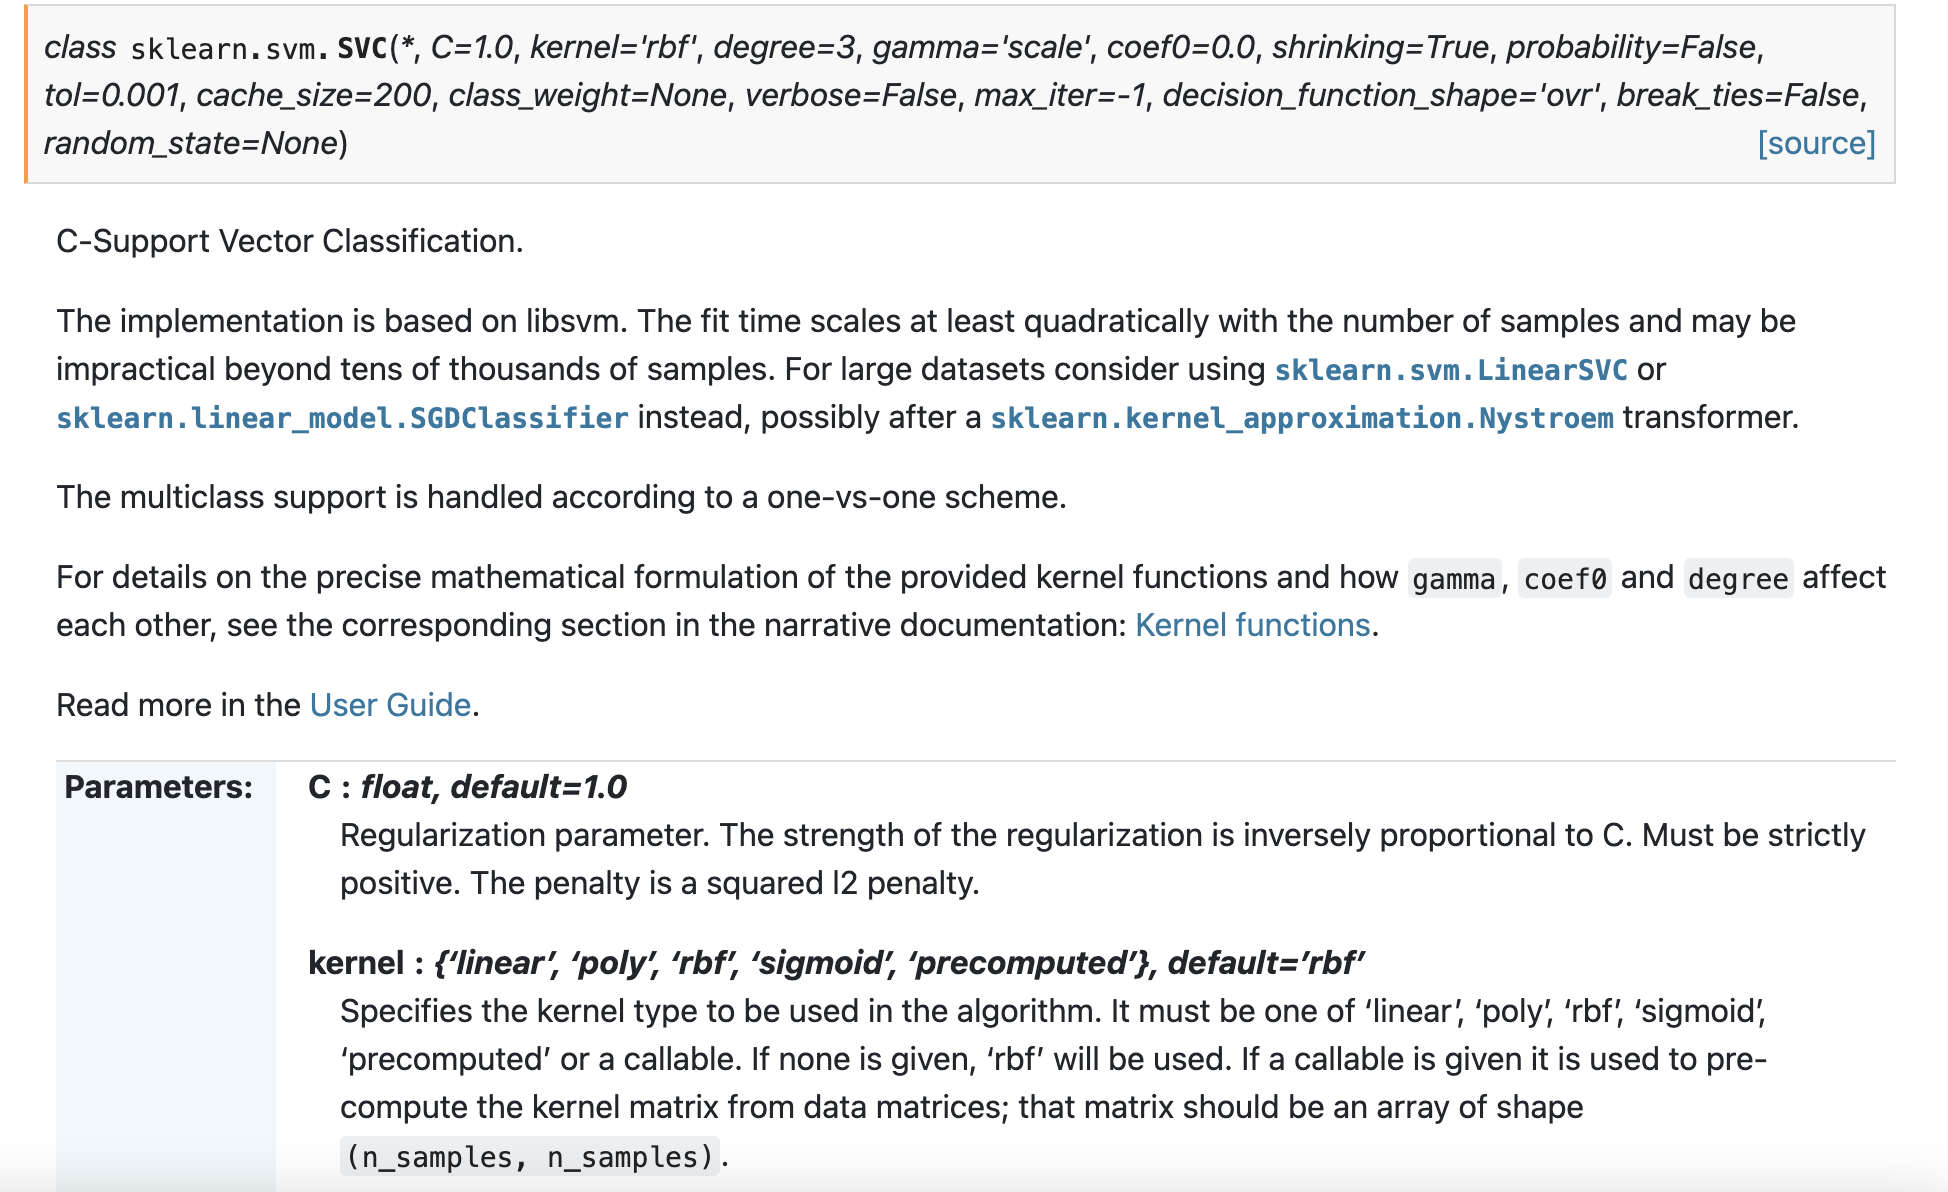

## SVC class in scikit-learn

### 규제 파라미터, regularization parameter: C 
* C 값이 작으면, 다른 그룹에 속하는 데이터 사이의 **간격을 최대한 넓히도록** 학습이 된다. 대신에 **어느 정도의 분류 오류는 허용**한다. (error를 꽤 허용해서 간격을 최대하화하여 line을 찾겠다.)
* C 값이 크면, 다른 그룹에 속하는 데이터 사이의 **간격이 좁아지는 것**을 허용하지만, **분류 오류를 최소화** 하는 방향으로 학습이 된다. (간격이 넓은것 보다 error를 최소화하는 방향으로 line을 찾겠다.)  

↓ 실선: 최적 line , 점선: grey area(오차를 허용하는 line)

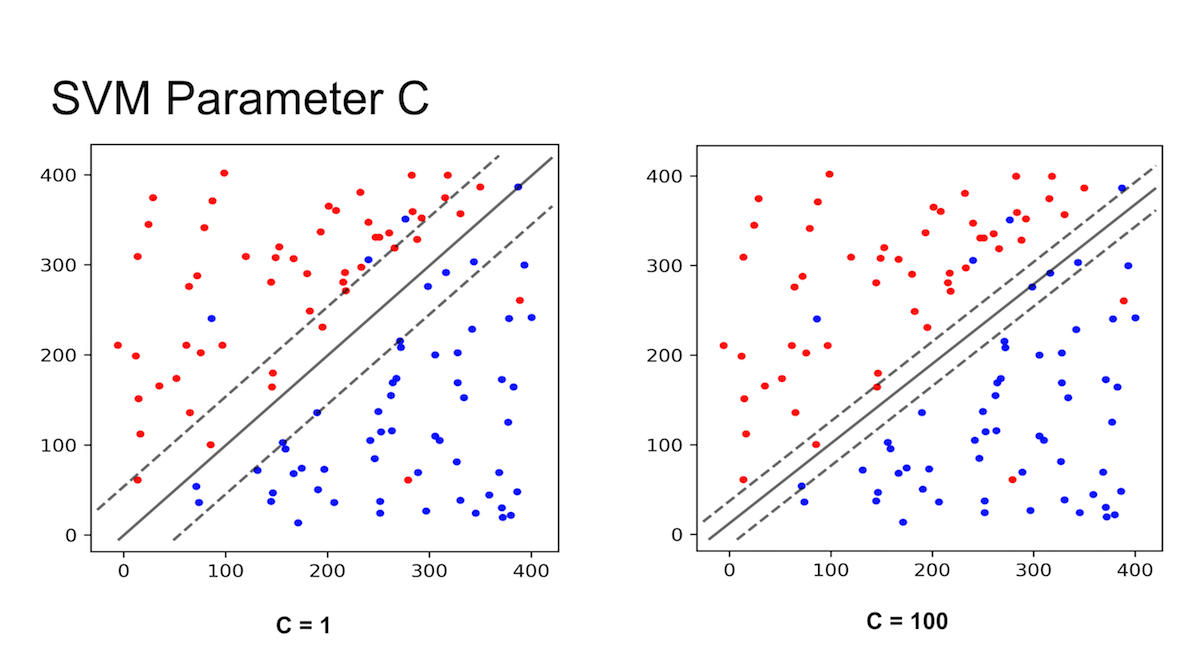

## ★ C 값을 바꾸면서 테스트 해보자

### C=10을 테스트해보자!

In [47]:
my_model_v2 = svm.SVC(C=10) # default 값은 C=1인데, 이 모델에서는 C=10을 사용해서 테스트!

In [48]:
my_model_v2.fit(X_train, y_train)

SVC(C=10)

* 에러메세지가 나오지 않았으므로 학습이 잘 되었다!

In [49]:
y_pred_v2 = my_model_v2.predict(X_test)

In [50]:
print(y_pred_v2)

[0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0]


In [51]:
f1_score(y_test, y_pred_v2)

0.35135135135135137

* Default 모델로 테스트 했을 때 F1 값이 0.331 이었음. 
* 현재 모델은 0.351로 성능이 조금 더 **향상** 되었다!

In [52]:
precision_score(y_test, y_pred_v2)

0.6842105263157895

In [53]:
recall_score(y_test, y_pred_v2)

0.23636363636363636

* 정확도는 비슷한테 재현율이 향상되었다! (실제 약중에서 약이라고 맞추는 갯수가 늘었다)

### C = 0.1 로 해보자. 

In [54]:
my_model_v3 = svm.SVC(C=0.1)

In [55]:
my_model_v3.fit(X_train, y_train)

SVC(C=0.1)

* 학습 끝!

In [56]:
y_pred = my_model_v3.predict(X_test)

In [57]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [58]:
f1_score(y_test, y_pred)

0.0

* C 값을 1/10로 줄였더니 학습이 되지 않았다!

In [59]:
precision_score(y_test, y_pred)

/Users/juyong/opt/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [60]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### C=100으로 해보자

In [61]:
my_model_v4 = svm.SVC(C=100)

In [62]:
my_model_v4.fit(X_train, y_train)

SVC(C=100)

In [63]:
y_pred_v4 = my_model_v4.predict(X_test)

In [64]:
f1_score(y_test, y_pred_v4)

0.4651162790697675

* f1 score가 C=10일 때, 0.35였는데 많이 향상되었다! (happy!)

In [65]:
precision_score(y_test, y_pred_v4)

0.6451612903225806

* 정확도는 0.68 에서 0.64로 약간 감소했다....

In [66]:
recall_score(y_test, y_pred_v4)

0.36363636363636365

* 재현율이 0.364이 많이 향상되었다!

코로나로 키트로 예를들면  
**정확도**= 진짜 양성/(진짜 양성+가짜 양성) , **재현율**= 진짜 양성/(진짜 양성+가짜 음성)  
정확도= 걸린사람/(걸린 사람+안걸린 사람) , 재현율= 걸린 사람/(걸린 사람+걸린 사람)

## 그러면 C=1000? C=10000? 어떻게 될까? 
* 여러분들이 한 번 해보세요~~~ 

## ★ gamma 값을 바꿔보자!
* gamma 값은 데이터 값이 어느 정도로 주변에 영향을 미치는지를 결정한다. 
* gamma 값이 크면, 각 데이터 값은 그 좁은 주변에만 영향을 미친다. 그룹을 분리하는 곡선이 복잡해진다. 
* gamma 값이 작으면, 넓은 영역에서 영향을 미치게 된다. 데이터를 구분하는 곡선이 직선에 가까워 진다.  
데이터의 복잡한 분포를 제대로 표현하기 힘들 수 있다.  
- ↓ gamma 값이 커질 수록 파란점의 영역을 묘사하는 곡선이 더 구체적이어 지는 것을 알 수 있다.  
너무 구체적이어지면 거의 그 파란점 근처에만 영향을 미치고 전체적인 데이터 분포를 나타내지 못함을 알 수 있다.  

(defalt 값은 약 1/데이터포인터)
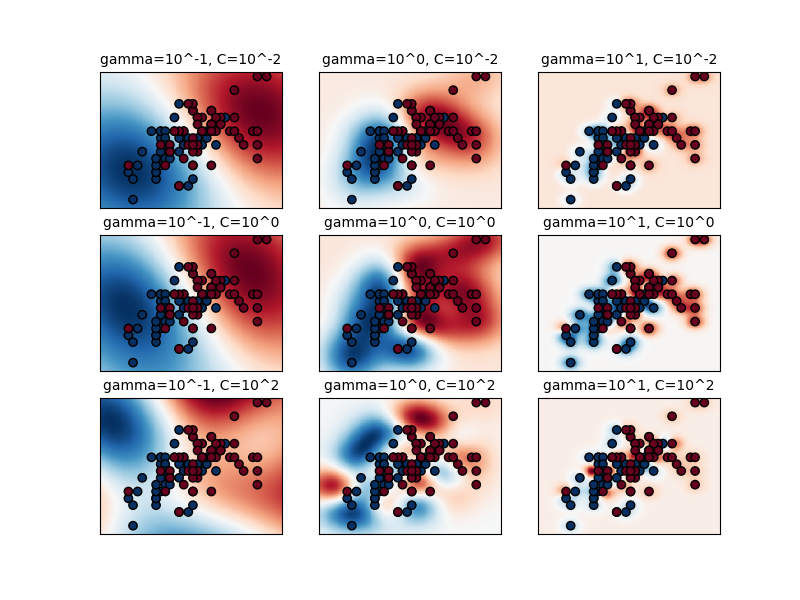

In [69]:
my_model5 = svm.SVC(gamma = 10.0)

In [70]:
my_model5.fit(X_train, y_train)
y_pred = my_model5.predict(X_test)

In [71]:
f1_score(y_test, y_pred)

0.38554216867469876

In [72]:
precision_score(y_test, y_pred)

0.5714285714285714

In [73]:
recall_score(y_test, y_pred)

0.2909090909090909

----

In [74]:
my_model6 = svm.SVC(C=1, gamma = 100.0)

In [75]:
my_model6.fit(X_train, y_train)
y_pred = my_model6.predict(X_test)
f1_score(y_test, y_pred)

0.14814814814814814

* 결과가 나빠졌다 ㅠㅠ

----

In [76]:
my_model6 = svm.SVC(C=1, gamma = 0.1)
my_model6.fit(X_train, y_train)
y_pred = my_model6.predict(X_test)
f1_score(y_test, y_pred)

0.21874999999999994

## ★ 이번에는 C 값과 gamma 값을 같이 바꿔보자!

In [77]:
my_model6 = svm.SVC(C=100, gamma=0.1)
my_model6.fit(X_train, y_train)
y_pred = my_model6.predict(X_test)
f1_score(y_test, y_pred)

0.326530612244898

In [82]:
my_model6 = svm.SVC(C=100, gamma=10**1)
my_model6.fit(X_train, y_train)
y_pred = my_model6.predict(X_test)
f1_score(y_test, y_pred)

0.39805825242718446

* 최적의 모델을 찾기 위해서는 다양한 하이퍼파라미터의 조합을 테스트 해볼 필요가 있다!

## ☆다른 커널을 사용해보자.  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Parameters: kernel
* 구분선을 선형(직선, linear)로 할 수도 있고, 곡선(non-linear)으로 할 수도 있다. 
* 이것을 결정해주기 위해서는 kernel(:core, 핵심)을 바꾸면 된다. 
* kernel <= core : 모델의 핵심에 들어있는 수학함수의 형태. 
* kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
    * linear: 선형 (ax+b)
    * poly: ax^3 + bx^2 + cx + d (3차원 다항식 커널)
    * **rbf**: Gaussian 과 비슷 <-defalt
    * sigmoid: 1/(1+e^x)

In [83]:
my_model_linear = svm.SVC(kernel='linear')
my_model_linear.fit(X_train, y_train)
y_pred_linear = my_model_linear.predict(X_test)

In [84]:
f1_score(y_test, y_pred_linear)

0.0

In [85]:
my_model_poly = svm.SVC(kernel='poly')
my_model_poly.fit(X_train, y_train)
y_pred_poly = my_model_linear.predict(X_test)
f1_score(y_test, y_pred_poly)

0.0

Hmmmmmm.... Does work that well. 

## ★ 그리드 서치 Let's find the optimal parameters systematically. 
### (학습 과정을 자동화시켜서 여러개를 해봄)

* 매번 손으로 parameter을 넣어보는 것은 노가다!
* 컴퓨터에게 반복 작업을 시키자!
* for 문을 이용하자!  
for 문으로 C 와 gamma를 바꾸면서 여러번 test해서 그중 max값을 찾도록 하자!

In [87]:
max_f1 = 0.0 
for c in [0.1, 1, 2, 5, 10, 100, 400, 500, 600, 1000]: # test할 다양한 C 값
    for g in [0.001, 0.01, 0.1, 0.5, 1.0, 2, 10, 50, 100]: # test할 다양한 gamma 값
        model = svm.SVC(C=c,gamma=g)
        model.fit(X_train, y_train) # 학습
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        if f1 > max_f1: # 기존의 최고의 F1 값을 넘었을 때. 
            max_f1 = f1
            max_prec = prec
            max_recall = recall
            max_c = c
            max_g = g
            
        print(f"C: {c}\tgamma: {g}\tF1: {f1}\tPrec: {prec}\tRecall: {recall}")
print("--End of Calculation!--")
print(f"max_C: {max_c}\tmax_gamma: {max_g}\tF1: {max_f1}\tPrec: {max_prec}\tRecall: {max_recall}")

/Users/juyong/opt/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juyong/opt/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juyong/opt/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juyong/opt/anaconda3/envs/rdkit/lib/pyt

C: 0.1	gamma: 0.001	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 0.1	gamma: 0.01	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 0.1	gamma: 0.1	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 0.1	gamma: 0.5	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 0.1	gamma: 1.0	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 0.1	gamma: 2	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 0.1	gamma: 10	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 0.1	gamma: 50	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 0.1	gamma: 100	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 1	gamma: 0.001	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 1	gamma: 0.01	F1: 0.01785714285714286	Prec: 0.5	Recall: 0.00909090909090909
C: 1	gamma: 0.1	F1: 0.21874999999999994	Prec: 0.7777777777777778	Recall: 0.12727272727272726


/Users/juyong/opt/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juyong/opt/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juyong/opt/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 1	gamma: 0.5	F1: 0.3401360544217687	Prec: 0.6756756756756757	Recall: 0.22727272727272727
C: 1	gamma: 1.0	F1: 0.38461538461538464	Prec: 0.6521739130434783	Recall: 0.2727272727272727
C: 1	gamma: 2	F1: 0.3773584905660377	Prec: 0.6122448979591837	Recall: 0.2727272727272727
C: 1	gamma: 10	F1: 0.38554216867469876	Prec: 0.5714285714285714	Recall: 0.2909090909090909
C: 1	gamma: 50	F1: 0.23776223776223776	Prec: 0.5151515151515151	Recall: 0.15454545454545454
C: 1	gamma: 100	F1: 0.14814814814814814	Prec: 0.4	Recall: 0.09090909090909091


/Users/juyong/opt/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 2	gamma: 0.001	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 2	gamma: 0.01	F1: 0.01785714285714286	Prec: 0.5	Recall: 0.00909090909090909
C: 2	gamma: 0.1	F1: 0.22556390977443608	Prec: 0.6521739130434783	Recall: 0.13636363636363635
C: 2	gamma: 0.5	F1: 0.35135135135135137	Prec: 0.6842105263157895	Recall: 0.23636363636363636
C: 2	gamma: 1.0	F1: 0.40506329113924044	Prec: 0.6666666666666666	Recall: 0.2909090909090909
C: 2	gamma: 2	F1: 0.4023668639053254	Prec: 0.576271186440678	Recall: 0.3090909090909091
C: 2	gamma: 10	F1: 0.42857142857142855	Prec: 0.5416666666666666	Recall: 0.35454545454545455
C: 2	gamma: 50	F1: 0.31446540880503143	Prec: 0.5102040816326531	Recall: 0.22727272727272727
C: 2	gamma: 100	F1: 0.2483660130718954	Prec: 0.4418604651162791	Recall: 0.17272727272727273
C: 5	gamma: 0.001	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 5	gamma: 0.01	F1: 0.01785714285714286	Prec: 0.5	Recall: 0.00909090909090909


/Users/juyong/opt/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 5	gamma: 0.1	F1: 0.3172413793103448	Prec: 0.6571428571428571	Recall: 0.20909090909090908
C: 5	gamma: 0.5	F1: 0.40993788819875776	Prec: 0.6470588235294118	Recall: 0.3
C: 5	gamma: 1.0	F1: 0.3850931677018633	Prec: 0.6078431372549019	Recall: 0.2818181818181818
C: 5	gamma: 2	F1: 0.44943820224719105	Prec: 0.5882352941176471	Recall: 0.36363636363636365
C: 5	gamma: 10	F1: 0.4338624338624339	Prec: 0.5189873417721519	Recall: 0.37272727272727274
C: 5	gamma: 50	F1: 0.3604651162790698	Prec: 0.5	Recall: 0.2818181818181818
C: 5	gamma: 100	F1: 0.23076923076923078	Prec: 0.391304347826087	Recall: 0.16363636363636364
C: 10	gamma: 0.001	F1: 0.0	Prec: 0.0	Recall: 0.0
C: 10	gamma: 0.01	F1: 0.018018018018018018	Prec: 1.0	Recall: 0.00909090909090909


/Users/juyong/opt/anaconda3/envs/rdkit/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C: 10	gamma: 0.1	F1: 0.35135135135135137	Prec: 0.6842105263157895	Recall: 0.23636363636363636
C: 10	gamma: 0.5	F1: 0.40993788819875776	Prec: 0.6470588235294118	Recall: 0.3
C: 10	gamma: 1.0	F1: 0.3975903614457832	Prec: 0.5892857142857143	Recall: 0.3
C: 10	gamma: 2	F1: 0.46236559139784944	Prec: 0.5657894736842105	Recall: 0.39090909090909093
C: 10	gamma: 10	F1: 0.42487046632124353	Prec: 0.4939759036144578	Recall: 0.37272727272727274
C: 10	gamma: 50	F1: 0.34117647058823525	Prec: 0.48333333333333334	Recall: 0.2636363636363636
C: 10	gamma: 100	F1: 0.22929936305732482	Prec: 0.3829787234042553	Recall: 0.16363636363636364
C: 100	gamma: 0.001	F1: 0.01785714285714286	Prec: 0.5	Recall: 0.00909090909090909
C: 100	gamma: 0.01	F1: 0.10169491525423728	Prec: 0.75	Recall: 0.05454545454545454
C: 100	gamma: 0.1	F1: 0.326530612244898	Prec: 0.6486486486486487	Recall: 0.21818181818181817
C: 100	gamma: 0.5	F1: 0.3780487804878049	Prec: 0.5740740740740741	Recall: 0.2818181818181818
C: 100	gamma: 1.0	F1: 0.46739

* C = 500, gamma = 1.0 일 때, F1 값이 0.535로 가장 좋았다!
* 물론 이 값이 최적은 아님!
* 우리가 이 예제에서 테스트 한 것은 72개의 조합만 테스트 했으므로.... 
* 최적의 파라미터를 찾기 위해서는 더 많은 테스트가 필요하다!